In [22]:
#Importando bibliotecas
import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # para plotar gráficos com seaborn

# Preprocessing, modelling and evaluating
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from xgboost import XGBClassifier
import xgboost as xgb
import datetime
import lightgbm as lgb

In [23]:
#Fazendo a leitura dos dados
#data_set_path = 'C:\\Users\\mlsob\\Developer\\Notebooks\\credit-risk-predict\\dataset\\credit-risk\\'
data_set_path = 'C:\\Users\\mlsob\\OneDrive\\Documentos\\Pagaleve\\dataset\\'

#train = pd.read_csv(data_set_path+'train.csv', header=(0))
#test = pd.read_csv(data_set_path+'test.csv', header=(0))

corpus = pd.read_csv(data_set_path+'Base_Safra_mar-abr22.csv', header=(0), sep=";")

#print("Número de linhas e colunas no conjunto de treinamento:", train.shape)
#print("Número de linhas e colunas no conjunto de teste:", test.shape)

print("Número de linhas e colunas no conjunto de teste:", corpus.shape)

#attributes = list(train.columns)
attributes = list(corpus.columns)

#train.head(10)
corpus.head(10)

Número de linhas e colunas no conjunto de teste: (3776, 17)


,customerid,planid,Anomes_ref,dataref,orderAmount,Saldo_Financiado,flag_d23,over5_D23,atraso_D23,score,idade,renda,Flag_Existente,flag_restritivo,flag_protesto,numberOfInstallments,items
0,462185ad-79d8-4ec3-bafc-ec2818f5b45d,0f5aaef2-aefb-483b-b8c1-58a8d4691b88,202204,26/04/2022,71.1,53.32,1,0.0,0,273,28,"2,712.92",1,0,0,4,"CAMISETA FUSCA PRETO - P, Embalagem pra Presente"
1,082d660a-4033-4a93-86f1-b9484770448a,52dbce69-2bcd-4a5c-9875-9c863fac721e,202204,26/04/2022,304,78,1,0.0,0,600,29,"1,801.27",0,0,0,4,calça jeans reta bicolor boywish mundo lolita ...
2,04813a97-e1ba-4ecc-8f73-fcf3b3dde8a2,d4a4fdf1-b19e-4fb7-aeeb-c4a611454ee1,202204,26/04/2022,117,87.75,1,0.0,0,881,35,"3,324.04",0,0,0,4,Kit de Body para Bebê Pica-pau Bordado - 2 peç...
3,0e84b174-5721-492c-82e7-f38979bc75e9,b6130bb4-3859-4d02-87a5-8f85209bcc40,202204,26/04/2022,142.2,106.65,1,0.0,0,694,31,"3,003.34",0,0,0,4,"CAMISETA PICA-PAU MEME BRANCO - M, Embalagem p..."
4,40c0ce62-8bee-4ce6-8746-61e6c1ee0943,fdc12cd5-c6dc-4f95-a129-773bd534b3ba,202204,26/04/2022,277.39,170.54,1,0.0,0,676,35,"3,541.2",0,0,0,4,vestido ombro único saturno mundo lolita M - 3...
5,265eb7e6-153b-429d-b3a5-b5000e659025,035ae542-6e6a-41f3-a5db-c8cc6366bd32,202204,26/04/2022,104.73,78.54,1,0.0,0,258,37,"1,821.03",0,1,1,4,CAMISETA PICA-PAU CERVEJA PRETO - GGG
6,44494159-833b-4cfc-9106-b461992d21d1,640987bd-5457-4c7c-8bde-4115eb1d83e4,202204,26/04/2022,236.1,27.07,1,0.0,0,747,24,"1,491.53",1,0,0,4,Pegador Multiuso de Alimentos em Inox e Silico...
7,3356be6e-522a-45cf-b49e-ad6ef970c95f,0defbf1e-8531-40d0-b17b-ad302f162106,202204,26/04/2022,777.01,582.75,1,0.0,0,745,34,"7,027.46",0,0,0,4,SUNGA ESTAMPADA PF MINI BZ SELVAGEM PRETO - 10...
8,0dfafe5c-e06a-401b-a125-6682c22c39a5,25122004-3333-4eb0-a6d5-4d15c44aba98,202204,26/04/2022,329.36,209.52,1,0.0,0,874,43,"8,733.98",0,0,0,4,Blusa Loba Choker Ras. (Adulto) Tamanho: U | C...
9,358397d3-879f-40e8-86d7-f7f45f979aa3,f1195a3e-50c3-4696-a707-3aaefdde5412,202204,26/04/2022,190.86,143.14,1,0.0,0,698,44,"1,916.69",0,0,0,4,Modelador Loba Tubinho Slim (Adulto) Tamanho: ...


In [32]:
corpus['flag_d23'].unique()

array([1], dtype=int64)

In [24]:
#Exclusão de atributo não relevante "Loan_ID" nos conjuntos de treino e teste
#train.drop(['Loan_ID'],axis = 1, inplace = True)
corpus.drop(['customerid'],axis = 1, inplace = True)
corpus.drop(['planid'],axis = 1, inplace = True)
corpus.drop(['dataref'],axis = 1, inplace = True)
corpus.drop(['items'],axis = 1, inplace = True)
#train.head(10)
corpus.head(10)
#print(train.shape)
#print(corpus.shape)

,Anomes_ref,orderAmount,Saldo_Financiado,flag_d23,over5_D23,atraso_D23,score,idade,renda,Flag_Existente,flag_restritivo,flag_protesto,numberOfInstallments
0,202204,71.1,53.32,1,0.0,0,273,28,"2,712.92",1,0,0,4
1,202204,304,78,1,0.0,0,600,29,"1,801.27",0,0,0,4
2,202204,117,87.75,1,0.0,0,881,35,"3,324.04",0,0,0,4
3,202204,142.2,106.65,1,0.0,0,694,31,"3,003.34",0,0,0,4
4,202204,277.39,170.54,1,0.0,0,676,35,"3,541.2",0,0,0,4
5,202204,104.73,78.54,1,0.0,0,258,37,"1,821.03",0,1,1,4
6,202204,236.1,27.07,1,0.0,0,747,24,"1,491.53",1,0,0,4
7,202204,777.01,582.75,1,0.0,0,745,34,"7,027.46",0,0,0,4
8,202204,329.36,209.52,1,0.0,0,874,43,"8,733.98",0,0,0,4
9,202204,190.86,143.14,1,0.0,0,698,44,"1,916.69",0,0,0,4


In [13]:
#import label enconding
#from sklearn import preprocessing


#label_enconder = preprocessing.LabelEncoder()

#train['Loan_Status'] = label_enconder.fit_transform(train['Loan_Status'])
##print(train['Loan_Status'])
#train.head(10)

In [14]:
#Exclusão de atributo não relevante "Loan_ID" nos conjuntos de teste
#Loan_ID_test = test['Loan_ID']
#test.drop(['Loan_ID'],axis = 1, inplace = True)
#test.head(10)

In [15]:
#Transformação de atributos categóricos em numéricos com One-ho-enconding para o conjunto de treino 
#train.head(10)
#train = pd.get_dummies(train)
#train.head(10)

In [16]:
#Transformação de atributos categóricos em numéricos com One-ho-enconding para o conjunto de teste
#test = pd.get_dummies(test)
#test.head(10)

In [25]:
#Identificação de valores nulos (not a number: nan), no conjunto de treino, com pandas
#train.isnull().sum().sort_values(ascending=False).head(10)
corpus.isnull().sum().sort_values(ascending=False).head(10)



Anomes_ref          0
orderAmount         0
Saldo_Financiado    0
flag_d23            0
over5_D23           0
atraso_D23          0
score               0
idade               0
renda               0
Flag_Existente      0
dtype: int64

In [18]:
#Identificação de valores nulos (not a number: nan), no conjunto de teste, com pandas
#test.isnull().sum().sort_values(ascending=False).head(10)

In [109]:
#Substituição de valores faltantes em cada instância no conjuntos de treino e teste por valores válidos (moda, média etc)
#train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])
#train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mode()[0])
#train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])

#test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0])
#test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mode()[0])
#test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])

In [110]:
#train.isnull().sum().sort_values(ascending=False).head(10)

ApplicantIncome            0
Dependents_1               0
Property_Area_Semiurban    0
Property_Area_Rural        0
Self_Employed_Yes          0
Self_Employed_No           0
Education_Not Graduate     0
Education_Graduate         0
Dependents_3+              0
Dependents_2               0
dtype: int64

In [111]:
#test.isnull().sum().sort_values(ascending=False).head(10)

ApplicantIncome            0
CoapplicantIncome          0
Property_Area_Semiurban    0
Property_Area_Rural        0
Self_Employed_Yes          0
Self_Employed_No           0
Education_Not Graduate     0
Education_Graduate         0
Dependents_3+              0
Dependents_2               0
dtype: int64

In [112]:
#converção dos dados para o formato numpy para facilitar tarefas de classificação e regressão
#Para o conjunto de treino
#data_train = train.to_numpy()
#print(data_train.shape)
#nrow,ncol = data_train.shape
#print(nrow)
#print(ncol)
#y = data_train[:,5]
#X = data_train[:,0:ncol-1]
#print(X)
#print(y)

(614, 21)
614
21
[[5.849e+03 0.000e+00 1.200e+02 ... 0.000e+00 0.000e+00 0.000e+00]
 [4.583e+03 1.508e+03 1.280e+02 ... 0.000e+00 1.000e+00 0.000e+00]
 [3.000e+03 0.000e+00 6.600e+01 ... 1.000e+00 0.000e+00 0.000e+00]
 ...
 [8.072e+03 2.400e+02 2.530e+02 ... 0.000e+00 0.000e+00 0.000e+00]
 [7.583e+03 0.000e+00 1.870e+02 ... 0.000e+00 0.000e+00 0.000e+00]
 [4.583e+03 0.000e+00 1.330e+02 ... 1.000e+00 0.000e+00 1.000e+00]]
[1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 

In [27]:
#converção dos dados para o formato numpy para facilitar tarefas de classificação e regressão
#Para o conjunto de treino
data_train = corpus.to_numpy()
print(data_train.shape)
nrow,ncol = data_train.shape
print(nrow)
print(ncol)
y = data_train[:,5]
X = data_train[:,0:ncol-1]
print(X)
print(y)

(3776, 13)
3776
13
[[202204 '71.1' '53.32' ... 1 0 0]
 [202204 '304' '78' ... 0 0 0]
 [202204 '117' '87.75' ... 0 0 0]
 ...
 [202203 '323.59' '242.69' ... 0 0 0]
 [202203 '318.88' '239.16' ... 1 0 0]
 [202203 '516.8' '387.6' ... 0 0 0]]
['0' '0' '0' ... '0' '0' '0']


In [ ]:
#converção dos dados para o formato numpy para facilitar tarefas de classificação e regressão
#Para o conjunto de treino
#data_train = train.to_numpy()
#print(data_train.shape)
#nrow,ncol = data_train.shape
#y = data_train[:,-1]
#X = data_train[:,0:ncol-1]
#print(y)
#print(X)

In [114]:
#Para o conjunto de teste
#data_test = test.to_numpy()
#X_test = data_test
#X_test

array([[5.720e+03, 0.000e+00, 1.100e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [3.076e+03, 1.500e+03, 1.260e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [5.000e+03, 1.800e+03, 2.080e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [3.250e+03, 1.993e+03, 1.260e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [5.000e+03, 2.393e+03, 1.580e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [9.200e+03, 0.000e+00, 9.800e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [29]:
#Normalizados, de modo a evitar o efeito da escala dos atributos nos métodos de aprendizado
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

#X_test = scaler.transform(X_test)

print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

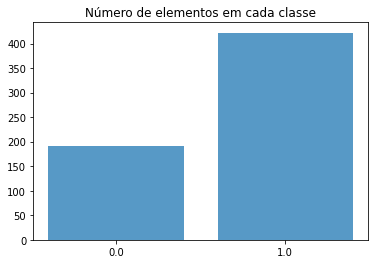

In [116]:
#Verificando o banlanceamento das classes
#classes = train[train.columns[0]]
classes = y
cl = np.unique(classes)
ncl = np.zeros(len(cl))
for i in np.arange(0, len(cl)):
    a = classes == cl[i]
    ncl[i] = len(classes[a])
    
numbers = np.arange(0, len(cl))
plt.bar(numbers, ncl,  alpha=.75)
plt.xticks(numbers, cl)
plt.title('Número de elementos em cada classe')
plt.show(True)

In [117]:
def plot_distribution_comp(df,label,var,nrow=2):
    
    i = 0
    t1 = df.loc[df[label] != 0]
    t0 = df.loc[df[label] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="label = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="label = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

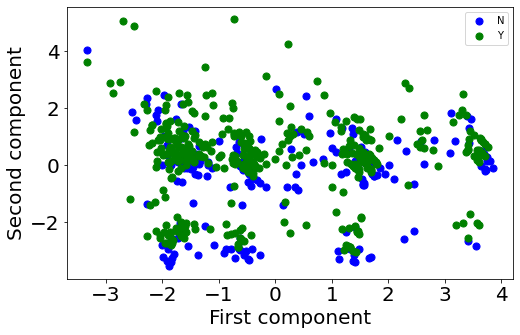

In [118]:
#Análise descritiva dos dados - Uso da técnica de PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

classes = np.unique(y)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0
plt.figure(figsize=(8,5))
for c in classes:
    if c == 1:
        lb = 'Y'
    else:
        lb = 'N'
    nodes = np.where(y == c)
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], label = lb)
    aux = aux + 1
plt.legend()
plt.xlabel("First component", fontsize=20)
plt.ylabel("Second component", fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

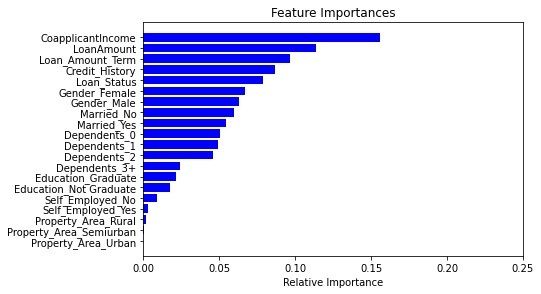

In [119]:
pca = PCA()
pca_result = pca.fit_transform(X)
var_exp = pca.explained_variance_ratio_

importances = var_exp
attributes = train.columns[1:len(train.columns)]
indices = np.argsort(importances)
attributes_rank = []
for i in indices:
    attributes_rank.append(attributes[i])
plt.title('Feature Importances')
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=10)
plt.xlabel('Relative Importance',fontsize=10)
plt.xticks(color='k', size=10)
plt.yticks(color='k', size=10)
plt.xlim([0.0, 0.25])
plt.show()

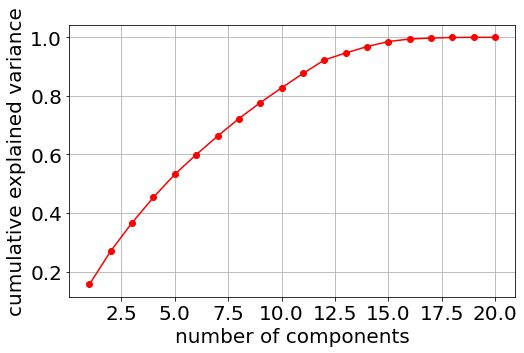

In [120]:
pca = PCA().fit(X)
plt.figure(figsize=(8,5))
ncomp = np.arange(1, np.shape(X)[1]+1)
plt.plot(ncomp, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.grid(True)
plt.show(True)

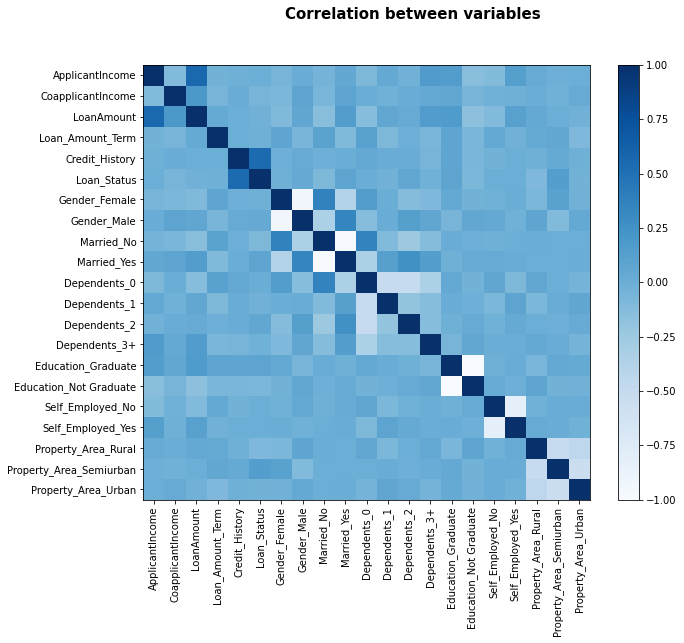

In [121]:
corr = train.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

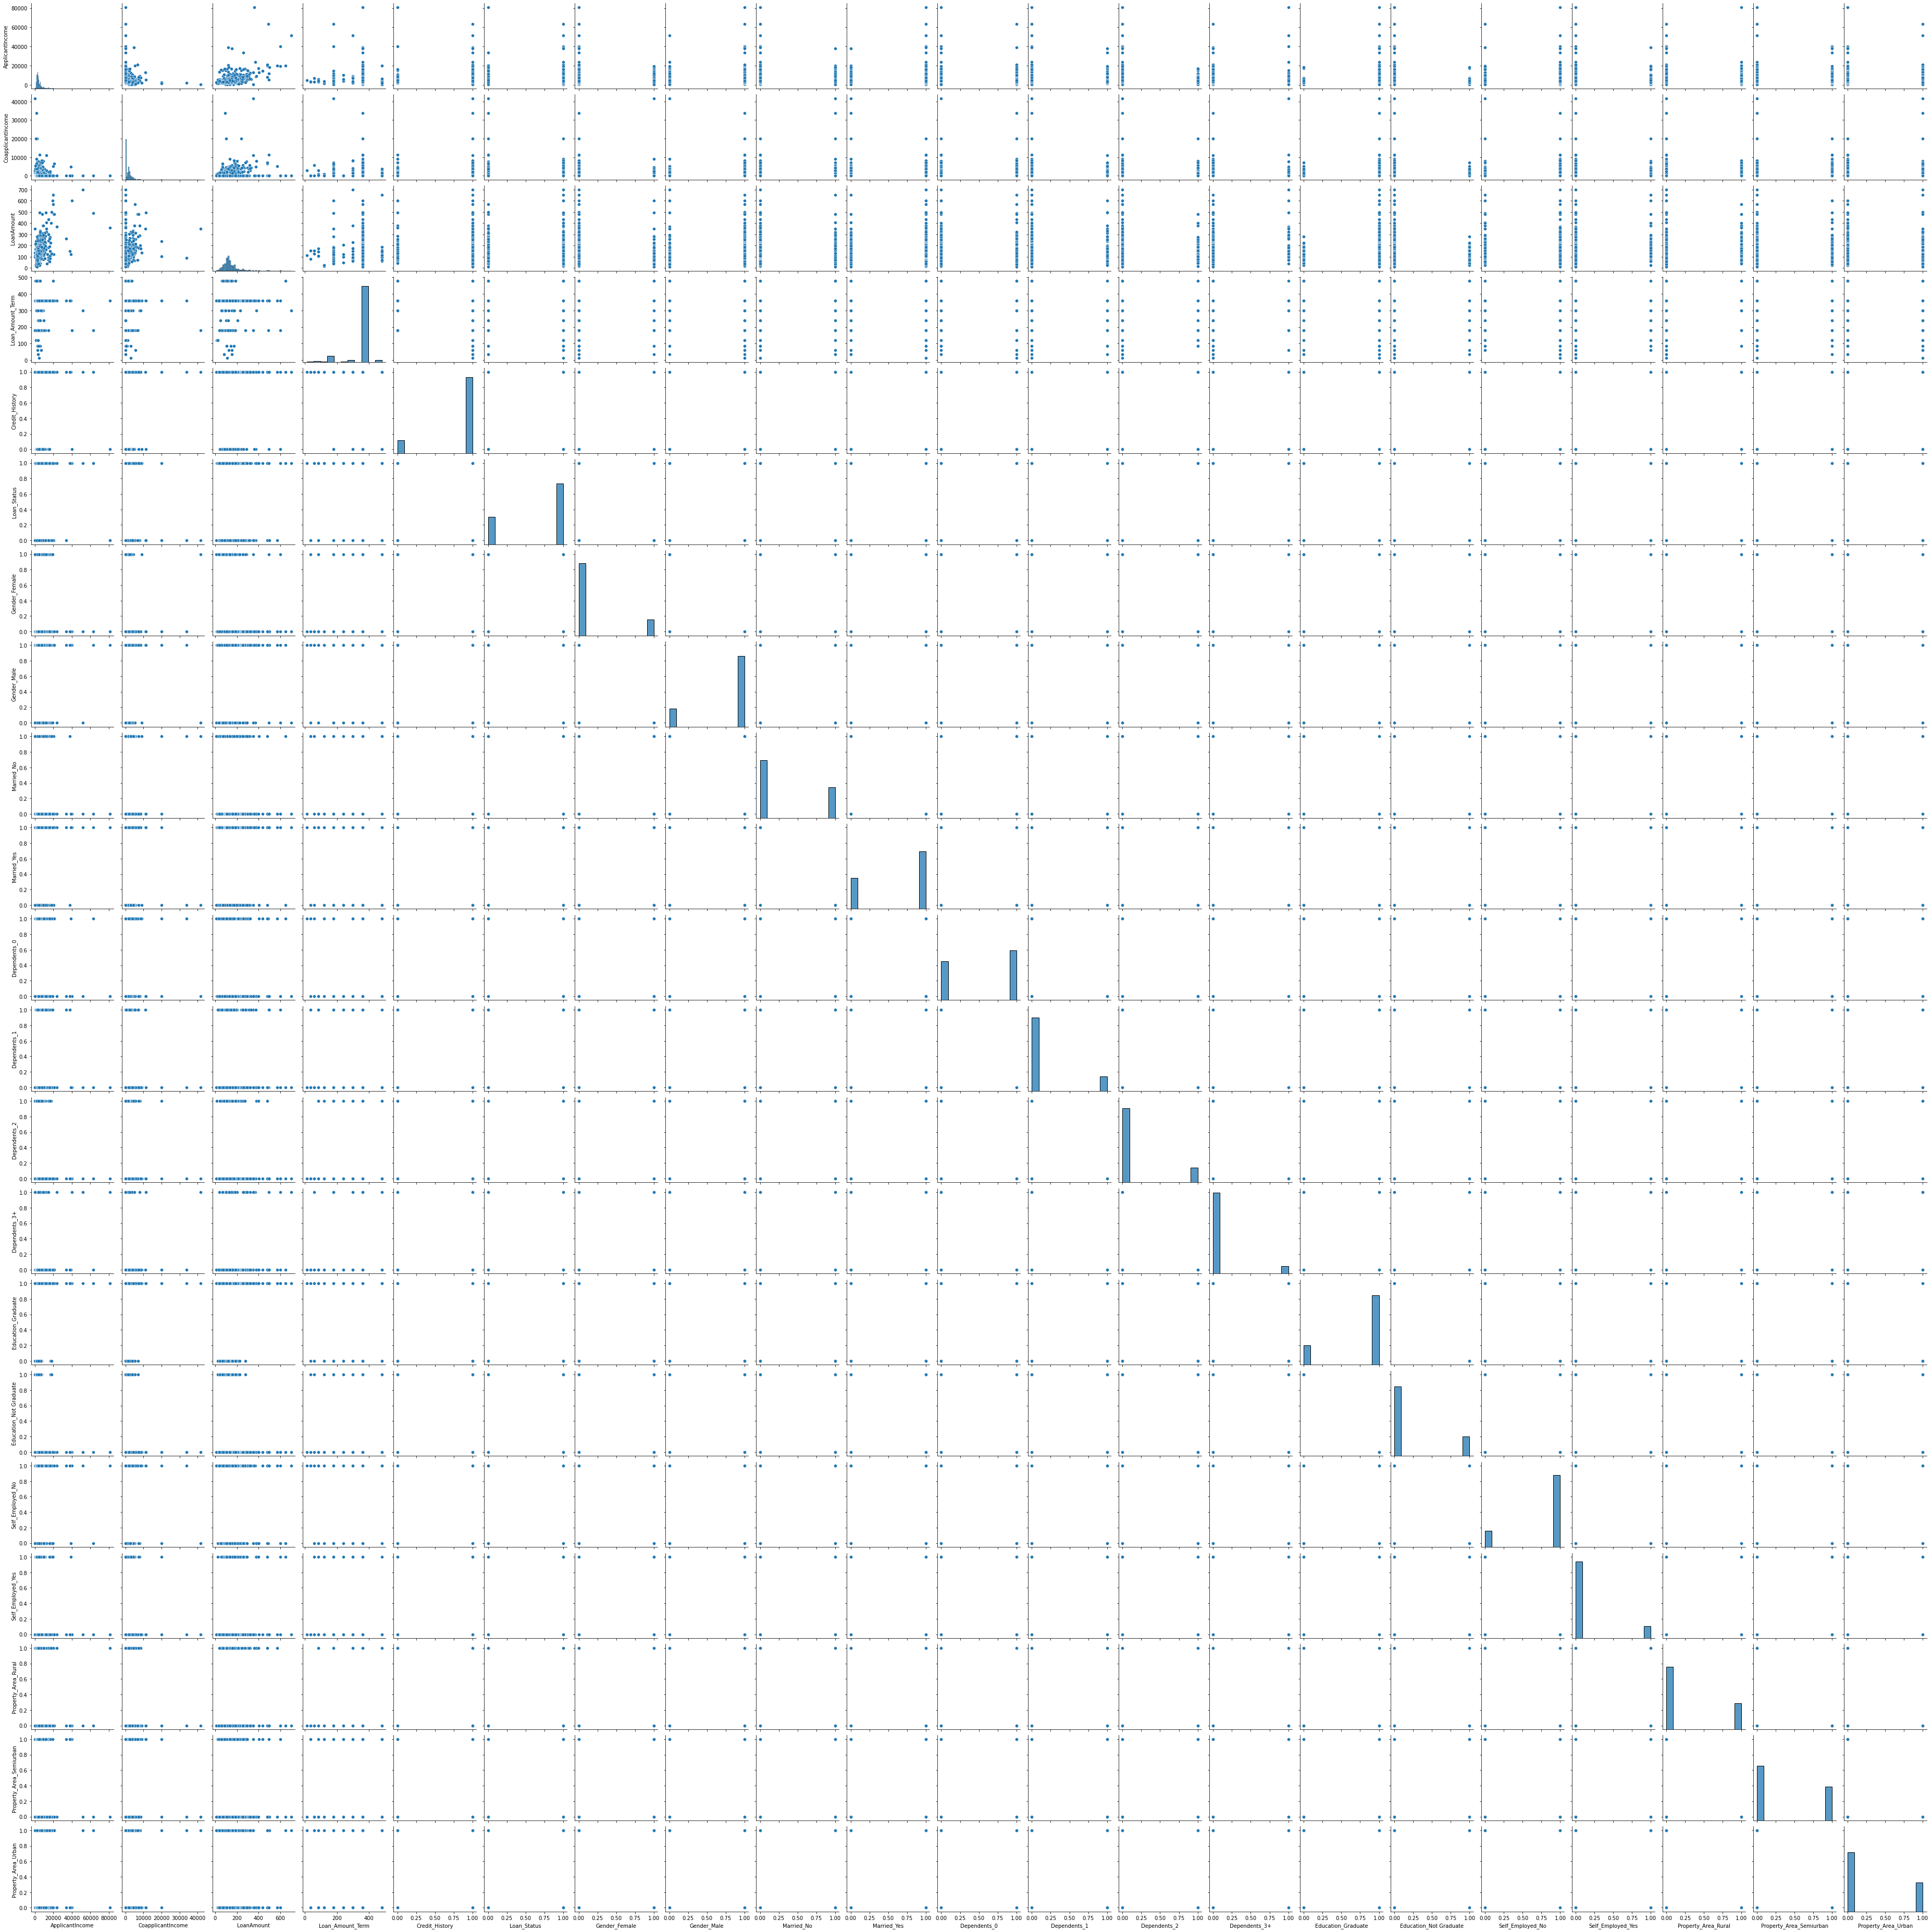

In [122]:
sns.pairplot(train)

Melhor k: 2  AUC: 0.915639680596841


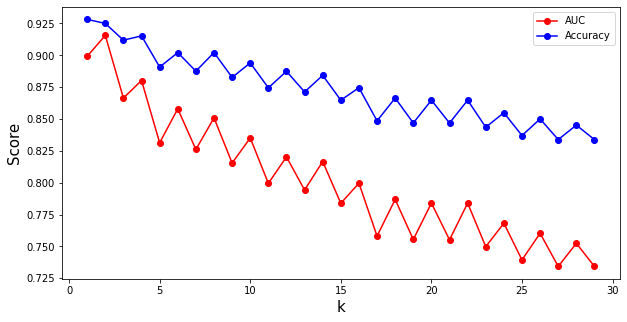

In [123]:
#K-nn com o método de validação cruzada estratificada
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
#cv = KFold(n_splits=10)
# enumerate the splits and summarize the distributions
mauc = []
macc = []
vk = []
for k in range(1, 30):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(X, y):
        # select rows
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test) 
        score = accuracy_score(y_pred, y_test)

        vauc.append(roc_auc_score(y_test, y_pred))
        vacc.append(accuracy_score(y_pred, y_test))
    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    vk.append(k)
    #print('k:', k)
    #print('Average accuracy:', np.mean(vacc))
    #print('Average AUC:', np.mean(vauc))
best_k = np.argmax(mauc)+1
print('Melhor k:', best_k, ' AUC:',mauc[best_k-1])
plt.figure(figsize=(10,5))
plt.plot(vk, mauc, '-ro', label= 'AUC')
plt.plot(vk, macc, '-bo', label = 'Accuracy')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

In [124]:
#Selecionando todo o conjunto de treinamento para ajustar o modelo
#Aplica o modelo no conjunto de teste
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 
score = accuracy_score(y_pred, y_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.819672131147541
F1 score: 0.7384015594541911
Precision: 0.8962264150943396
Recall: 0.7105263157894737


In [125]:
#Gravando resultado do Knn
knn_model = KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean')
knn_model.fit(X,y)

y_pred = knn_model.predict(X_test) 
y_pred = np.array(y_pred, dtype = int)
knn_prediction = pd.DataFrame()
knn_prediction['Loan_ID'] = Loan_ID_test
knn_prediction['Loan_Status'] = y_pred

knn_prediction.to_csv('Credit-Risk-Knn.csv', index = False)

In [126]:
#Importando a biblioteca joblib para a persistencia de um modelo de ML em disco
#from sklearn.externals import joblib
#import sklearn.external.joblib as extjoblib
import joblib

In [127]:
#Fazendo o dump do modelo knn
joblib.dump(knn_model, 'knn_model.pkl')

['knn_model.pkl']

In [129]:
#Listando os arquivos em disco
!dir

 O volume na unidade C � OS
 O N�mero de S�rie do Volume � AACB-36BB

 Pasta de c:\Users\mlsob\Developer\Notebooks\credit-risk-predict\models

23/05/2022  13:05    <DIR>          .
12/05/2022  13:22    <DIR>          ..
16/05/2022  19:25         4.684.847 credit-risk-analysis.ipynb
23/05/2022  13:05             4.425 Credit-Risk-Knn.csv
16/05/2022  19:25           285.854 credit-risk-model.ipynb
18/05/2022  12:42             4.425 Credit-Risk-RandomForest-kn.csv
18/05/2022  12:44             4.425 Credit-Risk-SVM.csv
23/05/2022  13:05           101.496 knn_model.pkl
18/05/2022  12:42             4.425 Titanic-SVM.csv
               7 arquivo(s)      5.089.897 bytes
               2 pasta(s)   263.619.084.288 bytes dispon�veis


In [147]:
#Carregando o modelo em memória
knn_model = joblib.load('knn_model.pkl')

In [150]:
#Verificando os atributos do modelo
print('Atributos do Modelo:\n\nClasses:{}\n\nNeighbors Number:{}'.format(knn_model.classes_, knn_model.n_neighbors))

Atributos do Modelo:

Classes:[0. 1.]

Neighbors Number:2


Melhor n: 4  AUC: 1.0


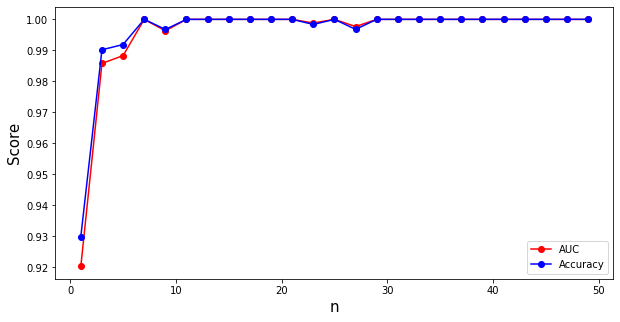

In [130]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
#cv = KFold(n_splits=10)
# enumerate the splits and summarize the distributions
mauc = []
macc = []
vn = []
for n in range(1, 50,2):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(X, y):
        # select rows
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = RandomForestClassifier(n_estimators=n)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test) 
        score = accuracy_score(y_pred, y_test)

        vauc.append(roc_auc_score(y_test, y_pred))
        vacc.append(accuracy_score(y_pred, y_test))
    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    vn.append(n)
best_n = np.argmax(mauc)+1
print('Melhor n:', best_n, ' AUC:',mauc[best_n-1])
plt.figure(figsize=(10,5))
plt.plot(vn, mauc, '-ro', label= 'AUC')
plt.plot(vn, macc, '-bo', label = 'Accuracy')
plt.xlabel('n', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

In [132]:
#Salvando resultado da random forest
rf_model = RandomForestClassifier(n_estimators=best_n)
rf_model.fit(X,y)

y_pred = rf_model.predict(X_test) 
y_pred = np.array(y_pred, dtype = int)

rf_prediction = pd.DataFrame()
rf_prediction['Loan_ID'] = Loan_ID_test
rf_prediction['Loan_Status'] = y_pred

rf_prediction.to_csv('Credit-Risk-RandomForest-kn.csv', index = False)

In [139]:
#Fazendo o dump do modelo da Random Forest e listando os arquivos em disco
joblib.dump(rf_model, 'rf_model.pkl')
!dir

 O volume na unidade C � OS
 O N�mero de S�rie do Volume � AACB-36BB

 Pasta de c:\Users\mlsob\Developer\Notebooks\credit-risk-predict\models

23/05/2022  13:16    <DIR>          .
12/05/2022  13:22    <DIR>          ..
16/05/2022  19:25         4.684.847 credit-risk-analysis.ipynb
23/05/2022  13:05             4.425 Credit-Risk-Knn.csv
16/05/2022  19:25           285.854 credit-risk-model.ipynb
23/05/2022  13:11             4.425 Credit-Risk-RandomForest-kn.csv
23/05/2022  13:16             4.425 Credit-Risk-SVM.csv
23/05/2022  13:05           101.496 knn_model.pkl
23/05/2022  13:17            13.993 rf_model.pkl
23/05/2022  13:16            12.913 svm_gs_model.pkl
23/05/2022  13:14             4.425 Titanic-SVM.csv
               9 arquivo(s)      5.116.803 bytes
               2 pasta(s)   262.523.523.072 bytes dispon�veis


In [144]:
#Carregando o modelo em memória
rf_model = joblib.load('rf_model.pkl')

In [146]:
#Verificando os atributos do modelo
print('Atributos do Modelo:\n\nClasses:{}\n\nEstimators:{}\n\nParameters:{}'.format(rf_model.classes_, rf_model.n_estimators, rf_model.base_estimator))

Atributos do Modelo:

Classes:[0. 1.]

Estimators:4

Parameters:DecisionTreeClassifier()


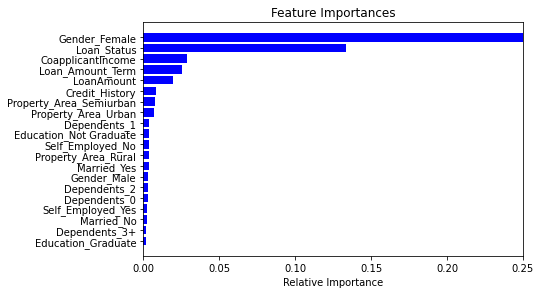

In [134]:
#Ordenação de atributos por importância no modelo de floresta aleatória
importances = model.feature_importances_
attributes = train.columns[1:len(train.columns)]
indices = np.argsort(importances)
attributes_rank = []
for i in indices:
    attributes_rank.append(attributes[i])
plt.title('Feature Importances')
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=10)
plt.xlabel('Relative Importance',fontsize=10)
plt.xticks(color='k', size=10)
plt.yticks(color='k', size=10)
plt.xlim([0.0, 0.25])
plt.show()

In [ ]:
#Selecionar atributos mais relevantes e retreinar a random forest

In [135]:
#SVM com kernel linear e com uso da função gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,5,10,20,30, 50], 'gamma':['auto']}
svc = svm.SVC()
svm_gs_model = GridSearchCV(svc, parameters, cv = 5)
svm_gs_model.fit(X,y)
print('Best parameters:', svm_gs_model.best_params_)

y_pred = model.predict(X_test) 
y_pred = np.array(y_pred, dtype = int)
svm_gs_prediction = pd.DataFrame()
svm_gs_prediction['Loan_ID'] = Loan_ID_test
svm_gs_prediction['Loan_Status'] = y_pred
svm_gs_prediction.to_csv('Titanic-SVM.csv', index = False)

print("Grid scores on development set:")
print()
means = svm_gs_model.cv_results_['mean_test_score']
stds = svm_gs_model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svm_gs_model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
print()

Best parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
Grid scores on development set:

1.000 (+/-0.000) for {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
0.995 (+/-0.013) for {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 2, 'gamma': 'auto', 'kernel': 'linear'}
0.995 (+/-0.013) for {'C': 2, 'gamma': 'auto', 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 5, 'gamma': 'auto', 'kernel': 'linear'}
0.995 (+/-0.013) for {'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 10, 'gamma': 'auto', 'kernel': 'linear'}
0.995 (+/-0.013) for {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 20, 'gamma': 'auto', 'kernel': 'linear'}
0.995 (+/-0.013) for {'C': 20, 'gamma': 'auto', 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 30, 'gamma': 'auto', 'kernel': 'linear'}
0.995 (+/-0.013) for {'C': 30, 'gamma': 'auto', 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 50, 'gamma': 'auto', 'kernel': 'linear'}
0.995 (+/-0.013) for {'C': 50, 'gamma': 'aut

In [136]:
#Salvando o resultado do SVM
y_pred = model.predict(X_test)
y_pred = np.array(y_pred, dtype = int)
svm_gs_prediction = pd.DataFrame()
svm_gs_prediction['Loan_ID'] = Loan_ID_test
svm_gs_prediction['Loan_Status'] = y_pred

svm_gs_prediction.to_csv('Credit-Risk-SVM.csv', index = False)

In [138]:
#Fazendo o dump do modelo da Random Forest e listando os arquivos em disco
joblib.dump(svm_gs_model, 'svm_gs_model.pkl')
!dir

 O volume na unidade C � OS
 O N�mero de S�rie do Volume � AACB-36BB

 Pasta de c:\Users\mlsob\Developer\Notebooks\credit-risk-predict\models

23/05/2022  13:16    <DIR>          .
12/05/2022  13:22    <DIR>          ..
16/05/2022  19:25         4.684.847 credit-risk-analysis.ipynb
23/05/2022  13:05             4.425 Credit-Risk-Knn.csv
16/05/2022  19:25           285.854 credit-risk-model.ipynb
23/05/2022  13:11             4.425 Credit-Risk-RandomForest-kn.csv
23/05/2022  13:16             4.425 Credit-Risk-SVM.csv
23/05/2022  13:05           101.496 knn_model.pkl
23/05/2022  13:16            12.913 rf_model.pkl
23/05/2022  13:16            12.913 svm_gs_model.pkl
23/05/2022  13:14             4.425 Titanic-SVM.csv
               9 arquivo(s)      5.115.723 bytes
               2 pasta(s)   262.523.498.496 bytes dispon�veis


In [142]:
#Carregando o modelo em memória
svm_gs_model = joblib.load('svm_gs_model.pkl')

In [143]:
#Verificando os atributos do modelo
print('Atributos do Modelo:\n\nClasses:{}\n\nEstimators:{}\n\nParameters:{}'.format(svm_gs_model.classes_, svm_gs_model.estimator, svm_gs_model.param_grid))

Atributos do Modelo:

Classes:[0. 1.]

Estimators:SVC()

Parameters:{'kernel': ('linear', 'rbf'), 'C': [1, 2, 5, 10, 20, 30, 50], 'gamma': ['auto']}


In [155]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


In [162]:
#Criando uma nova instancia
teste = np.array([[600, 120, 100, 350, 1.0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1]])

In [163]:
#submentendo a nova instancia ao modelo e verificando sua resposta preditiva
svm_gs_model.predict(teste)

array([1.])

In [165]:
#svm_gs_model.predict_proba(teste)